Imports

In [53]:
import numpy as np
import matplotlib.pyplot as plt
 

Class Creation

In [54]:
class TwoArmedBandit:
    def __init__(self, epsilon: float = 0.1, episodes: int = 5000):
        """ 
        inputs:
            epsilon: float, probability of exploration for epsilon-greedy policy
            episodes: int, number of times to pull an arm
        outputs:
            None
        """
        
        self.reward_history_greedy = {0: [], 1: []}  # Store rewards for each arm
        self.reward_history_epsilon = {0: [], 1: []}  # Store rewards for each arm
        self.choice_history_greedy = {0: [], 1: []}  # Store choices for each arm
        self.choice_history_epsilon = {0: [], 1: []}  # Store choices for each arm
        self.average_rewards_greedy = [0.0, 0.0]  # Average rewards for each arm (Greedy)
        self.average_rewards_epsilon = [0.0, 0.0]  # Average rewards for each arm (Epsilon-Greedy)
        self.epsilon = epsilon if epsilon is not None and 0 < epsilon < 1 else 0.1  # Exploration probability for epsilon-greedy policy
        self.true_arm_one = 0.8 #Good arm
        self.true_arm_two = 0.2 #Bad arm
        self.episodes = episodes
        self.__known_best_epsilon = None  # This is only here to be able to highlight the best epsilon on the plot

This Function resets the "state" of the class

In [55]:
def reset(self) -> None:
    """ 
    inputs:
        None
    outputs:
        None
    """
    self.reward_history_greedy = {0: [], 1: []}
    self.reward_history_epsilon = {0: [], 1: []}
    self.choice_history_greedy = {0: [], 1: []}
    self.choice_history_epsilon = {0: [], 1: []}
    self.average_rewards_greedy = [0.0, 0.0]
    self.average_rewards_epsilon = [0.0, 0.0]

Runs a simulation based on the initalized number of episodes

In [56]:
def run_simulation(self, printing: bool = False) -> None:
            """ 
            outputs:
                None, prints the results of the simulation
            """
            
            pulls_greedy = [0, 0]  # Number of times each arm has been pulled [Arm 1 (Good), Arm 2 (Bad)]
            pulls_epsilon = [0, 0] 
            sum_rewards_greedy = [0, 0]  # Total rewards for each arm
            sum_rewards_epsilon = [0, 0]

            for i in range(self.episodes):
                if i == 0:
                    choice = np.random.choice([0, 1])  # Randomly choose an arm for the first pull
                else:
                    choice = self.greedy_policy()
                reward = self.pull_arm(choice)
                pulls_greedy[choice] += 1
                sum_rewards_greedy[choice] += reward
                self.average_rewards_greedy[choice] = sum_rewards_greedy[choice] / pulls_greedy[choice]
                self.reward_history_greedy[choice].append(reward)
                self.choice_history_greedy[choice].append(choice)

                if i == 0:
                    choice = np.random.choice([0, 1])  # Randomly choose an arm for the first pull
                else:
                    choice = self.epsilon_greedy_policy(epsilon=self.epsilon)
                reward = self.pull_arm(choice)
                pulls_epsilon[choice] += 1
                sum_rewards_epsilon[choice] += reward
                self.average_rewards_epsilon[choice] = sum_rewards_epsilon[choice] / pulls_epsilon[choice]
                self.reward_history_epsilon[choice].append(reward)
                self.choice_history_epsilon[choice].append(choice)

            if printing:
                print("---Greedy Policy---")
                print(f"Total pulls: {pulls_greedy}")
                print(f"Total rewards: {sum_rewards_greedy}")
                print(f"Average rewards: {self.average_rewards_greedy}")
                print("\n---Epsilon-Greedy Policy---")
                print(f"Total pulls: {pulls_epsilon}")
                print(f"Total rewards: {sum_rewards_epsilon}")
                print(f"Average rewards: {self.average_rewards_epsilon}")
                

When I went to plot the results of the sumulations, I found it was hard to do using the variables of the class, so using temp variables and returning them to the plotting function made this easier. 

In [57]:
def _run_single_simulation(self, policy_name: str) -> np.ndarray:
        """Helper to run one simulation for a single policy and return reward history."""
        
        local_avg_rewards = [0.0, 0.0] 
        pulls = [0, 0]
        sum_rewards = [0, 0]
        temp_reward_history = np.zeros(self.episodes)
        
        for i in range(self.episodes):
            
            if policy_name == 'greedy':
                choice = i % 2 if i < 2 else np.argmax(local_avg_rewards) # Choose both arms once first.
                
                
            elif policy_name == 'epsilon':
                if np.random.rand() < self.epsilon:
                    choice = np.random.choice([0, 1])
                else:
                    choice = np.argmax(local_avg_rewards) #[Arm 1, Arm 2]
            else:
                raise ValueError("Invalid policy_name")

            reward = self.pull_arm(choice)
            
            pulls[choice] += 1
            sum_rewards[choice] += reward
            local_avg_rewards[choice] = sum_rewards[choice] / pulls[choice]
            temp_reward_history[i] = reward
            
        return temp_reward_history

This function finds the optimal epsilon value for the agent and marks it on a graph. Thought it was cool to make even though in this case its very simple. 

In [58]:
def _plot_epsilon_optimization(self, filepath: str, epsilon_values: list[float], average_rewards: list[float]) -> None:
    """ 
    inputs:
        epsilon_values: list of float, epsilon values tested
        average_rewards: list of float, corresponding average rewards
    outputs:
        None, displays plot
    """
    import matplotlib.pyplot as plt

    plt.figure(figsize=(8, 5))
    plt.title("Epsilon Optimization: Average Rewards vs Epsilon Values")
    plt.scatter(epsilon_values, average_rewards,
                marker='o', 
                alpha=0.7, 
                color='slategray',
                s=3,)
    plt.scatter(self.__known_best_epsilon, max(average_rewards),
                marker='*',
                color='red',
                alpha=0.9,
                s=100,
                label=f'Best Epsilon: {self.__known_best_epsilon:.3f}')
    plt.xlabel('Epsilon Values')
    plt.ylabel('Average Rewards')
    plt.grid()
    if filepath:
        plt.savefig(filepath, bbox_inches='tight', facecolor='white')
    plt.show()
        

Simple to change the epsilon cleanly.

In [59]:
def change_epsilon(self, new_epsilon: float) -> None:
    """ 
    inputs:
        new_epsilon: float, new epsilon value
    outputs:
        None
    """
    if 0 < new_epsilon < 1:
        self.epsilon = new_epsilon
    else:
        raise ValueError("Epsilon must be between 0 and 1.")    

Runs a given amount of episodes and plots the results, can also be given a filepath to save to.

In [60]:
def plot_results(self,filepath: str, episodes: int = 200) -> None:
    """
    outputs:
        None, displays a plot comparing the two policies.
    """
    import matplotlib.pyplot as plt

    # Arrays to store the reward at each step for every run
    temp_greedy_rewards = np.zeros((episodes, self.episodes))
    temp_epsilon_rewards = np.zeros((episodes, self.episodes))

    for i in range(episodes):
        temp_greedy_rewards[i, :] = self._run_single_simulation('greedy')
        temp_epsilon_rewards[i, :] = self._run_single_simulation('epsilon')

    mean_greedy_rewards = np.mean(temp_greedy_rewards, axis=0)
    mean_epsilon_rewards = np.mean(temp_epsilon_rewards, axis=0)
    
    cumulative_avg_greedy = np.cumsum(mean_greedy_rewards) / (np.arange(self.episodes) + 1)
    cumulative_avg_epsilon = np.cumsum(mean_epsilon_rewards) / (np.arange(self.episodes) + 1)


    plt.figure(figsize=(12, 8))
    plt.title(f"Policy Performance Comparison (Averaged over {episodes} runs)")
    plt.plot(np.arange(self.episodes), cumulative_avg_greedy, label="Greedy Policy")
    plt.plot(np.arange(self.episodes), cumulative_avg_epsilon, label=f"Epsilon-Greedy Policy (ε={self.epsilon})")
    plt.xlabel("Episodes (Arm Pulls)")
    plt.ylabel("Average Reward")
    plt.legend()
    plt.grid(True)
    
    if filepath:
        plt.savefig(filepath, bbox_inches='tight', facecolor='white')
    
    plt.show()
    

Finds the optimal epsilon value, can return a plot if wanted, can change in place if wanted.

In [61]:
def optimize_epsilon(self, filepath: str, epsilon_values: list[float], plot: bool = True, inplace: bool = False) -> float:
    """ 
    inputs:
        epsilon_values: list of float, epsilon values to test
        plot: bool, whether to plot the results. True by default.
        inplace: bool, whether to update the object's epsilon value. False by default.
    outputs:
        float, best epsilon value
    """
    best_epsilon = epsilon_values[0]
    best_average_reward = -1
    average_rewards_per_epsilon = []

    for epsilon in epsilon_values:
        self.epsilon = epsilon
        self.reset()
        
        self.run_simulation(printing=False) 
        
        
        total_rewards = sum(self.reward_history_epsilon[0]) + sum(self.reward_history_epsilon[1])
        average_reward = total_rewards / self.episodes
        average_rewards_per_epsilon.append(average_reward)

        if average_reward > best_average_reward:
            best_average_reward = average_reward
            best_epsilon = epsilon
    self.__known_best_epsilon = best_epsilon  # Store for plot
    if plot:
        self._plot_epsilon_optimization( filepath, epsilon_values, average_rewards_per_epsilon)
    if inplace:
        self.epsilon = best_epsilon
    print(f"Best epsilon found: {best_epsilon:.3f} with an average reward of {best_average_reward:.3f}")
    return best_epsilon

Runs a bunch of simulations and prints the average results

In [62]:
def run_batch_simulation(self, batches: int = 100, ) -> None:
    """
    inputs:
        batches: int, number of simulations to run
    outputs:
        None, prints the averaged results of the simulations
    """
    total_pulls_greedy = np.array([0, 0])
    total_rewards_greedy = np.array([0, 0])
    total_pulls_epsilon = np.array([0, 0])
    total_rewards_epsilon = np.array([0, 0])

    for _ in range(batches):
        self.run_simulation()
        total_pulls_greedy += np.array([len(self.choice_history_greedy[0]), len(self.choice_history_greedy[1])])
        total_rewards_greedy += np.array([sum(self.reward_history_greedy[0]), sum(self.reward_history_greedy[1])])
        total_pulls_epsilon += np.array([len(self.choice_history_epsilon[0]), len(self.choice_history_epsilon[1])])
        total_rewards_epsilon += np.array([sum(self.reward_history_epsilon[0]), sum(self.reward_history_epsilon[1])])
    
    print("\n---Averaged Results over Batches---")
    print("---Greedy Policy---")
    print(f"Average pulls: {total_pulls_greedy / batches}")
    print(f"Average rewards: {total_rewards_greedy / batches}")
    print("\n---Epsilon-Greedy Policy---")
    print(f"Average pulls: {total_pulls_epsilon / batches}")
    print(f"Average rewards: {total_rewards_epsilon / batches}")
    return


Actually making a choice

In [63]:
def pull_arm(self, arm: int) -> 0 | 1:
    """ 
    inputs:
        arm: float, probability of payout for the selected arm
    outputs:
        int, 1 for payout, 0 for no payout
    """
    
    match arm:
        case 0:
            return 1 if np.random.rand() < self.true_arm_one else 0 #Good arm
        case 1:
            return 1 if np.random.rand() < self.true_arm_two else 0 #Bad arm



The two policies

In [64]:
def greedy_policy(self) -> 0 | 1:
    """
    Will always choose the arm with the highest average reward so far.
    """
    return np.argmax(self.average_rewards_greedy) #Will either return 0 for arm 1 of 1 for arm 2

def epsilon_greedy_policy(self, epsilon=0.1) -> 0 | 1:
    """ 
    With probability epsilon, will choose a random arm.
    With probability 1-epsilon, will choose the arm with the highest average reward so far.
    """
    if np.random.rand() < epsilon:
        return np.random.choice([0, 1]) #Randomly choose an arm
    else:
        return np.argmax(self.average_rewards_epsilon) #Choose the best arm so far
    

This cell makes it so you can actually run the functions as part of the class since they are defined in seperate cells.

In [65]:
TwoArmedBandit.epsilon_greedy_policy = epsilon_greedy_policy
TwoArmedBandit.greedy_policy = greedy_policy
TwoArmedBandit.run_batch_simulation = run_batch_simulation
TwoArmedBandit.plot_results = plot_results
TwoArmedBandit.optimize_epsilon = optimize_epsilon
TwoArmedBandit.reset = reset
TwoArmedBandit.pull_arm = pull_arm
TwoArmedBandit._plot_epsilon_optimization = _plot_epsilon_optimization
TwoArmedBandit._run_single_simulation = _run_single_simulation  
TwoArmedBandit.run_simulation = run_simulation

Analysis and Notes

My results show that once an optimal epsilon value is found, it will always outperfom the greedy policy given enough episodes.
By looking at my epsilon optimization plot, I found that an epsilon value of around 0.08-0.1 gives the highest average reward. Which makes sense as the arms are so 
imbalanced that once the better arm is found, it should alwayus be chosen. So a lower epsilon value is optimal in this case. Which is reflected in the results plot as well.
And when we compare the two policies, we see that the epsilon greedy policy always outperfoms. The only way this could change is the greedy policy only chose 
randomly on its very first pull and happened to choose the better arm. In which case it would have an average reward of 1, becuase it will only every choose the better arm after that.
However in this simulation over a long enough time, the epsilon greedy policy will always outperfom the greedy policy becuase it is unlikely to choose the right arm every time.


Note: I definilty over engineered this solutiopn, but I found it kind of enjoyable to do so. I believe that gymnasium library seen in the midtern notebook
has a built in n-armed bandit module, but I thought it would be good practice to impliment my own. A lot of the plot code is inspired or taken by
my 301 class Data Visulatization notes. The rest of it is my ideas and implimentation with some help from AI to refactor so the simulations didnt take 10 minutes to run (Accidently had a On^2 for loop that was running 50,000,000 iterations).

Testing 

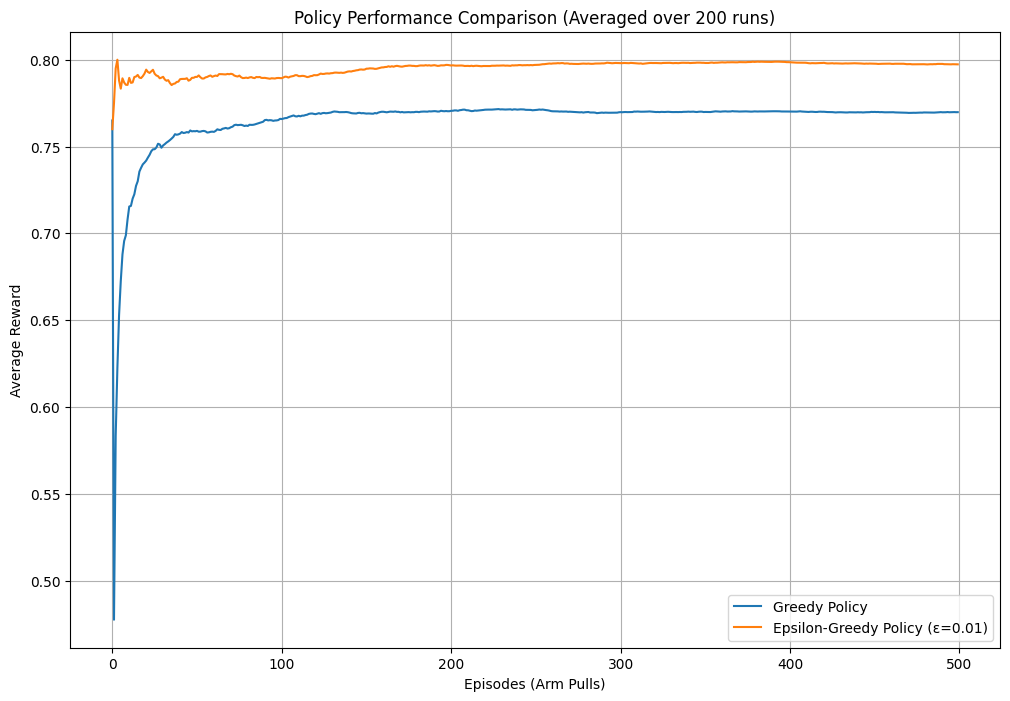

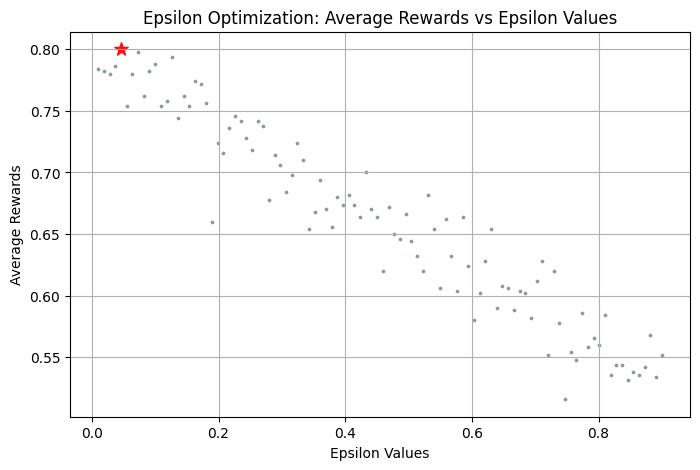

Best epsilon found: 0.046 with an average reward of 0.800


0.045959595959595964

In [66]:
test = TwoArmedBandit(epsilon=0.01, episodes=500)
test.plot_results(filepath='policy_comparison.png', episodes=200)
test.optimize_epsilon(filepath='epsilon_optimization.png', epsilon_values=np.linspace(0.01, 0.9, 100).tolist(), plot=True, inplace=True)